#1 Importing packages
---
---

In [1]:
%pip install seaborn
%pip install uproot
%pip install awkward
%pip install mplhep
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install uproot awkward mplhep numpy matplotlib scipy --upgrade
%pip install ipympl

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


Requirement already up-to-date: uproot in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (4.0.6)


Requirement already up-to-date: awkward in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (1.1.2)


Requirement already up-to-date: mplhep in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (0.2.18)


Requirement already up-to-date: numpy in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (1.20.1)


Requirement already up-to-date: matplotlib in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (3.3.4)


Requirement already up-to-date: scipy in /projects/1108709f-2e8c-4e84-af0d-3a68ef8a314e/.sage/local/lib/python3.8/site-packages (1.6.1)


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable


     |██████████████████████████████▉ | 102 kB 11.6 MB/s eta 0:00:01

     |████████████████████████████████| 106 kB 11.6 MB/s 


     |████████████████████████████████| 121 kB 18.0 MB/s 


     |████████████████████████████████| 243 kB 20.8 MB/s 


     |████████████████████████████████| 97 kB 5.5 MB/s 


You should consider upgrading via the '/usr/local/sage/local/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np #Mathmatical functions
import uproot
import awkward as ak
import mplhep
#%matplotlib inline 


import ipywidgets as widgets

import matplotlib.pyplot as plt #Plotting
import seaborn as sb
sb.set_style("darkgrid")

from scipy import optimize
import scipy.odr as odr     # Fitting
from scipy.odr import *
from scipy.optimize import curve_fit
import math

from scipy.signal import argrelextrema  # For searching extrema

---

---

#2 GROPE test data
---
---

In [4]:
# Events: Hadronic, Electronic, Muon, Tauon
# Properties: Run, Event, Number of charged tracks (N_Ctrk), Sum of momentum of all charged tracks (P_Ctrk), Sum of energy in the electromagnetic calorimeter (E_Cal), Sum of the energy in the hadronic calorimeter (H_Cal), Counts in muon chamber (N_mu)
# -> For each type of event a 7 x Number of events matrix/array

In [6]:
# All energies in GeV
E_beam = 45.57

electron_events = np.asarray([[5227,441,3,0,92,0.2,0],[5227,566,7,84.4,89.1,0.2,0],[5227,589,2,92.2,89.5,0.2,0],[5227,949,7,0,67.9,0,0],[5227,1247,3,78.5,90.3,0.3,0],[5227,1272,2,83.8,93.5,0.9,0],[5227,1297,5,0,75.3,0.8,0],[8227,1302,0,0,84.1,0.8,0],[5227,1319,2,71,91.6,1.8,0],[5227,1575,6,0,95.3,1.4,0],[5227,1672,2,71.6,92.2,0,0],[5227,1687,2,71.3,94.2,0.7,0],[5227,1862,2,74.4,88.5,0.3,0],[5227,1879,14,0,83.8,0.3,0],[5227,1886,2,83.2,91.2,0.3,0],[5227,1976,6,47.9,90.3,0.3,0],[5227,2197,5,65.1,92.5,0,0],[5227,2224,2,82.5,90.3,0.3,0],[5227,2273,4,0,91.1,2.2,0],[5227,2416,2,0,90.1,6.1,0],[5227,2433,2,0,97.3,0.3,0],[5227,2564,6,2,90.8,0.7,0],[5227,2571,2,59.9,92.3,0.3,0],[5227,2617,2,78.9,91,0.3,0],[5227,2767,5,0,86.4,0.3,0],[5227,2775,7,0,63.1,2.6,0],[5227,2819,2,90.2,91.2,0.3,0],[5227,2910,3,47.9,95.1,0,0],[5227,2938,2,85.8,83.1,0.9,0],[5227,5998,4,0,120.2,12.7,0]])

tauon_events = np.asarray([[5227,714,4,43.8,8.2,2,0],[5227,934,2,31.4,36.1,0.2,0],[5227,984,2,43,31.7,2.4,1],[5227,1402,5,37.6,43,0.6,0],[5227,1524,2,55,49.7,36.8,0],[5227,1532,2,33.9,52,13.6,0],[5227,1663,3,0,31.1,0.3,0],[5227,2252,14,44.7,35.7,3.3,0],[5227,2564,6,2,90.8,0.7,0],[5227,2954,6,67,45,33.6,0],[5227,3913,2,99.3,16.6,16.8,2],[5227,4083,4,45.8,40.1,38.2,0],[5227,4628,8,0,70.8,0,0],[5227,4692,2,30.4,21.7,7.5,1],[5227,5753,2,41.1,40.6,2.6,1],[5227,5821,2,26.9,51.8,0,0],[5227,6533,4,64.6,29.8,9.2,0],[5227,6541,13,44.9,37.5,2.2,0],[5227,6724,2,25,44.9,4.1,1],[5227,7093,2,29.8,36.5,23.4,0],[5227,7228,4,42,42.4,0.5,0],[5227,7667,2,22.4,17.1,10.3,1],[5227,7877,4,13.1,29,0,0],[5227,8109,4,47.7,25.1,2,0],[5227,8485,2,30.4,24.4,0.8,0],[5227,9671,6,37,27.5,4.6,0],[5227,9731,2,52.2,30.6,2.3,1],[5227,9825,3,92.8,3.5,2.3,1],[5227,9918,2,93.6,4.1,0,0],[5227,9940,4,41.1,21.3,2.1,1]])

hadronic_events = np.asarray([[5227,523,51,77.3,42.1,3.0,0], [5227,672,52,54.8,39.7,15.8,0], [5227,832,28,50,55.7,11.9,1], [5227,917,24,32,46.7,8.3,0], [5227,989,36,53.3,33.2,16.3,1], [5227,1140,28,13.9,58.4,5.5,2], [5227,1203,39,40.4,58.8,0.6,0], [5227,1288,21,43.3,50.8,203.9,0], [5227,1455,30,3.2,37.2,3.3,0], [5227,1586,22,293.1,52.9,15.7,0], [5227,1675,34,39.8,50.7,13.5,1], [5227,1837,39,72.0,41.4,25.0,1], [5227,1997,20,66.2,23.8,15.9,1], [5227,2109,25,49.7,37.8,48.7,1], [5227,2205,25,53.8,53.2,17.7,1], [5227,2320,53,13.2,51.5,6.0,0], [5227,2474,30,60.2,37.8,84.6,3], [5227,2658,37,18.9,58.8,9.0,0], [5227,2754,23,60.9,53.4,28.4,1], [5227,2884,27,48.7,57.0,9.5,1], [5227,2995,9,59.8,55.6,23.3,1], [5227,3184,31,58.6,43.9,29.3,2], [5227,3290,19,45.3,73.2,3.4,0], [5227,3473,33,51.3,48.1,35.5,1], [5227,3656,45,21.9,55.6,6.5,0], [5227,3762,27,52.9,59.7,22.1,2], [5227,3895,27,22.5,33.4,41.2,1], [5227,4471,24,67.6,50.0,22.8,2], [5227,4552,24,50.9,42.9,12.5,0], [5227,4716,40,52.6,57.1,2.4,0]]) # Event 5227:4046 No measurement for P_Ctrk -> Was excluded

muon_events = np.asarray([[5227,1176,6,84.7,1.4,2.4,2], [5227,1326,2,89.5,1.6,13.4,2], [5227,1369,2,98.2,2.6,9.9,2], [5227,1384,2,105.1,1.8,6.6,2], [5227,1577,2,84.1,5.4,13.8,2], [5227,1851,2,88.1,1.5,3.5,2], [5227,2295,2,119.1,2.1,6.2,2], [5227,2443,4,87.3,5.3,30.3,2], [5227,2762,2,87.7,3.0,9.3,1], [5227,2911,2,87.0,1.8,10.0,2], [5227,3092,2,93.0,1.3,2.6,2], [5227,3112,2,80.9,3.1,4.7,1], [5227,3167,4,92.3,1.7,5.5,2], [5227,3245,2,89.0,3.1,5.3,3], [5227,3439,2,93.4,1.7,1.8,2], [5227,3595,7,94.3,1.3,3.9,2], [5227,3862,2,86.5,6.2,44.7,1], [5227,3981,2,90.3,2.5,18.8,2], [5227,4168,2,83.2,1.8,4.9,2], [5227,4196,2,96.1,1.8,10.7,3], [5227,5057,2,92.6,2.3,11.3,2], [5227,5397,2,87.3,10.6,9.7,2], [5227,5536,2,106.1,2.2,9.8,1], [5227,6116,2,92.7,1.6,7.2,2], [5227,6173,2,29.0,3.2,0.5,1], [5227,6358,2,82.8,1.7,5.3,3], [5227,6709,4,84.1,9.0,1.3,0], [5227,7097,2,90.5,1.3,9.1,2], [5227,7740,2,98.8,2.1,3.4,2], [5227,7956,4,95.0,4.0,5.4,2]])

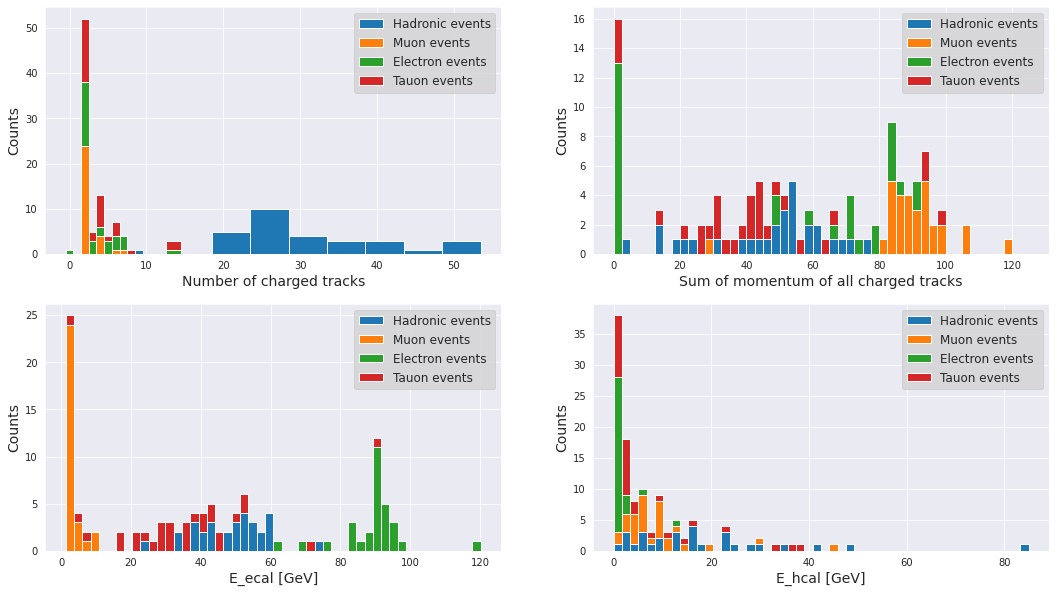

In [7]:
# histograms

#Manually chosen bins (numbers define bin seperations)
bins_N_Ctrk = np.asarray([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,12.5,14.5,16.5,18.5,23.5,28.5,33.5,38.5,43.5,48.5,53.5])

%matplotlib inline
sb.set_style("darkgrid")

fig,axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=14)
axs[0,0].set_ylabel("Counts", fontsize=14)
axs[0,0].hist((hadronic_events[:,2],muon_events[:,2],electron_events[:,2],tauon_events[:,2]), bins=bins_N_Ctrk, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
axs[0,1].set_ylabel("Counts", fontsize=14)
axs[0,1].hist((hadronic_events[:,3],muon_events[:,3],electron_events[:,3],tauon_events[:,3]), range=(0,125), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# range parameter is used to exclude single data point at 293.1 so the rest of the distribution is better visible
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=14)
axs[1,0].set_ylabel("Counts", fontsize=14)
axs[1,0].hist((hadronic_events[:,4],muon_events[:,4],electron_events[:,4],tauon_events[:,4]), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=14)
axs[1,1].set_ylabel("Counts", fontsize=14)
axs[1,1].hist((hadronic_events[:,5],muon_events[:,5],electron_events[:,5],tauon_events[:,5]), bins=50, range=(0,85), label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# range is again to exclude a single point at around 200 GeV (more energy than we had initially) to focus the rest of the distribution - maybe exclude the point at little over 80 as well?


In [8]:
#plt.savefig("name.PDF")
# activate for saving the picture if desired for the protocol - .PDF saves the figure with higher quality (compared to jpg or png)

In [3]:
# histogram (N_Muon)

#Manually chosen bins
bins_N_Muon = np.asarray([-0.5,0.5,1.5,2.5,3.5,])

%matplotlib inline
sb.set_style("darkgrid")

plt.hist((hadronic_events[:,6],muon_events[:,6],electron_events[:,6],tauon_events[:,6]), bins=bins_N_Muon, rwidth=0.6, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) # rwidth parameter determines the bar width.

plt.xlabel("Number of detected muons", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

NameError: name 'hadronic_events' is not defined

In [10]:
#plt.savefig("name.PDF")

In [11]:
# First ideas for cuts: 

# E_Cal: Highest energies - electrons, lowest energies - muons
# N_Ctrk. Highest Numbers - hadronic

# Next step... Maybe ratios of several measurands? E.g. P_Ctrk/N_Ctrk giving the average momentum of the charged track detected. Possibly muon events are better distinguishable using this ratio than directly P_Ctrk?

In [12]:
# Muon detection: low energy in E_cal (<15 GeV) and height P_Ctrk (>~80)
# electron detection: high energy in E_cal (> 75 GeV)
# Tauon detection : middle energy in E_cal (15-55 GeV)
# Hadron detection: middle energy in E_cal (20-75 GeV)

---

---

#3 Determining cuts and cut efficiencies with MC data
---
---

### A: Introducing and showing MC data

In [4]:
# Incorporate Monte-Carlo simulated data

path_data = 'opal_data/mc/'

mm_file = uproot.open(path_data+'mm.root')
qq_file = uproot.open(path_data+'qq.root')
ee_file = uproot.open(path_data+'ee.root')
tt_file = uproot.open(path_data+'tt.root')

ttree_name = 'myTTree'

mm_file[ttree_name].keys()

branches_mm = mm_file[ttree_name].arrays()
branches_qq = qq_file[ttree_name].arrays()
branches_ee = ee_file[ttree_name].arrays()
branches_tt = tt_file[ttree_name].arrays()

var_run = 'run'
var_event = 'event'
var_N_char = 'Ncharged'
var_P_char = 'Pcharged'
var_E_ecal = 'E_ecal'
var_E_hcal = 'E_hcal'
var_E_beam = 'E_lep'
var_cos_thru = 'cos_thru'
var_cos_thet = 'cos_thet'

# arrays sorted by properties: run, event, N_char, P_char, E_ecal, E_hcal, E_beam, cos_thru, cos_thet
qq=np.asarray([ak.to_numpy(branches_qq[var_run]),ak.to_numpy(branches_qq[var_event]),ak.to_numpy(branches_qq[var_N_char]),ak.to_numpy(branches_qq[var_P_char]),ak.to_numpy(branches_qq[var_E_ecal]),ak.to_numpy(branches_qq[var_E_hcal]),ak.to_numpy(branches_qq[var_E_beam]),ak.to_numpy(branches_qq[var_cos_thru]),ak.to_numpy(branches_qq[var_cos_thet])])
mm=np.asarray([ak.to_numpy(branches_mm[var_run]),ak.to_numpy(branches_mm[var_event]),ak.to_numpy(branches_mm[var_N_char]),ak.to_numpy(branches_mm[var_P_char]),ak.to_numpy(branches_mm[var_E_ecal]),ak.to_numpy(branches_mm[var_E_hcal]),ak.to_numpy(branches_mm[var_E_beam]),ak.to_numpy(branches_mm[var_cos_thru]),ak.to_numpy(branches_mm[var_cos_thet])])
ee=np.asarray([ak.to_numpy(branches_ee[var_run]),ak.to_numpy(branches_ee[var_event]),ak.to_numpy(branches_ee[var_N_char]),ak.to_numpy(branches_ee[var_P_char]),ak.to_numpy(branches_ee[var_E_ecal]),ak.to_numpy(branches_ee[var_E_hcal]),ak.to_numpy(branches_ee[var_E_beam]),ak.to_numpy(branches_ee[var_cos_thru]),ak.to_numpy(branches_ee[var_cos_thet])])
tt=np.asarray([ak.to_numpy(branches_tt[var_run]),ak.to_numpy(branches_tt[var_event]),ak.to_numpy(branches_tt[var_N_char]),ak.to_numpy(branches_tt[var_P_char]),ak.to_numpy(branches_tt[var_E_ecal]),ak.to_numpy(branches_tt[var_E_hcal]),ak.to_numpy(branches_tt[var_E_beam]),ak.to_numpy(branches_tt[var_cos_thru]),ak.to_numpy(branches_tt[var_cos_thet])])

[999. 999. 999. ... 999. 999. 999.]


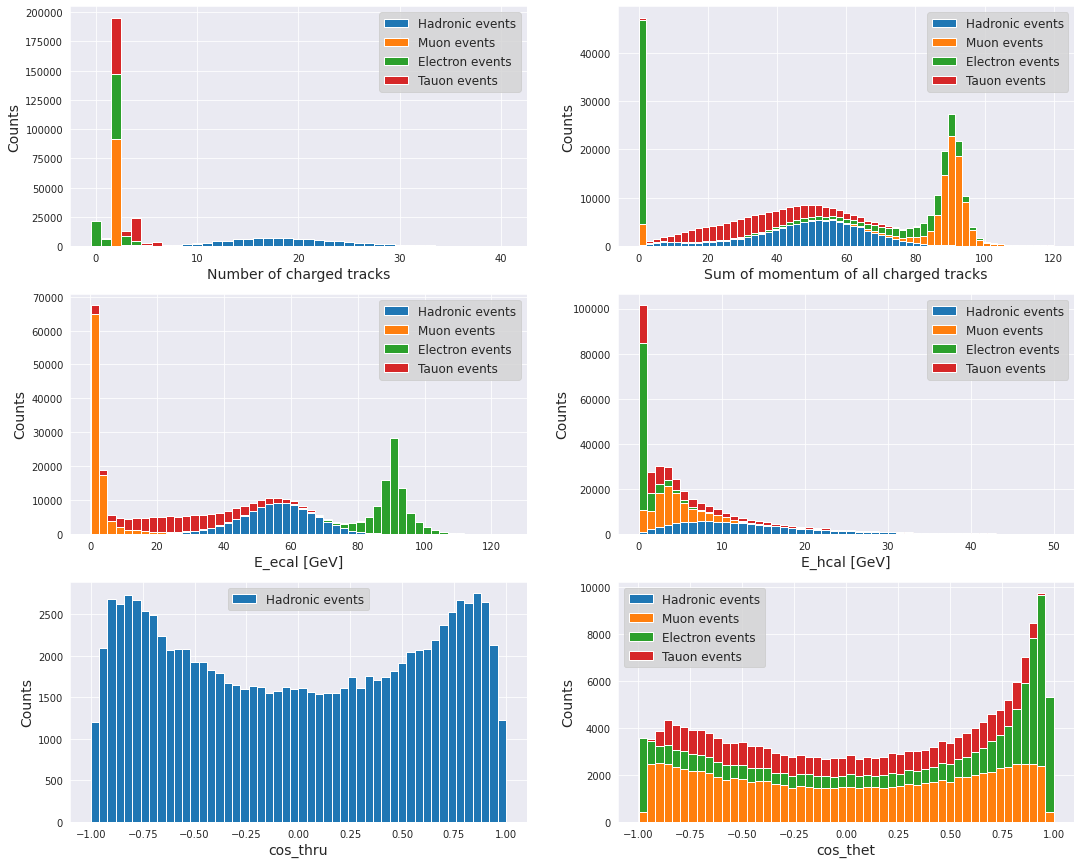

In [4]:
%matplotlib inline
sb.set_style("darkgrid")

#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)

fig,axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=14)
axs[0,0].set_ylabel("Counts", fontsize=14)
axs[0,0].hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
axs[0,1].set_ylabel("Counts", fontsize=14)
axs[0,1].hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=14)
axs[1,0].set_ylabel("Counts", fontsize=14)
axs[1,0].hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=14)
axs[1,1].set_ylabel("Counts", fontsize=14)
axs[1,1].hist((qq[5,:],mm[5,:],ee[5,:],tt[5,:]), bins=50, range=(0,50), label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# I am pretty sure that we need cos thru only for the hadrons and cos thet only for the leptons, I changed it to that way for the hadrons, the leptons are yet unchanged
# exclude or include correct labels, if we go forward with it
axs[2,0].set_xlabel("cos_thru", fontsize=14)
axs[2,0].set_ylabel("Counts", fontsize=14)
axs[2,0].hist(qq[7,:], bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) #,mm[7,:],ee[7,:],tt[7,:])
axs[2,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

cos_thet_ee = ee[8,:][ee[8,:] < 2]
cos_thet_mm = mm[8,:][mm[8,:] < 2]
cos_thet_tt = tt[8,:][tt[8,:] < 2]
cos_thet_qq = np.zeros(1)
print(qq[8,:])

# how do we keep the colour scheme when we dont want to include the hadronic events? I created an array with zeros of lenght one for that now

axs[2,1].set_xlabel("cos_thet", fontsize=14)
axs[2,1].set_ylabel("Counts", fontsize=14)
axs[2,1].hist((cos_thet_qq,cos_thet_mm,cos_thet_ee,cos_thet_tt), bins=50, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)  # qq[8,:],mm[8,:],ee[8,:],tt[8,:]
axs[2,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)

# I wouldn't plot only hadrons for cos_thru and only leptons for cos_thet. I suggest we show all data here and concentrate on electron events in the next section

In [15]:
#plt.savefig("name.PDF")

### B: Cuts for all four event types

##### Hadronic events

The percentage of hadron events surviving the cut 0.9947241865608798 , the share of electron  0.00026651883755143813  muon  0.0  tauon  0.01232105435907794  and hadron  0.9947241865608798  events on the total of the cut survivors with the cut 'mask_qq_N_Ctrk'


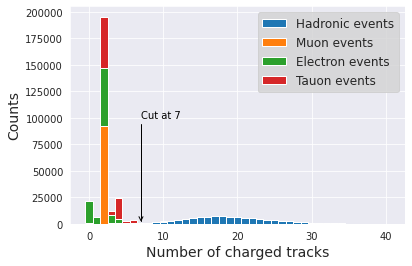

In [4]:
cut = 6  # Gives the value for the cut

mask_qq_N_Ctrk = branches_qq[var_N_char] > cut
mask_ee_N_Ctrk = branches_ee[var_N_char] > cut
mask_tt_N_Ctrk = branches_tt[var_N_char] > cut
mask_mm_N_Ctrk = branches_mm[var_N_char] > cut

efficiency_qq = np.sum(mask_qq_N_Ctrk)/len(mask_qq_N_Ctrk) # Gives the percentage of hadron events surviving the cut
precision_qe = np.sum(mask_ee_N_Ctrk)/ len(ee[1,:])
precision_qm = np.sum(mask_mm_N_Ctrk)/ len(mm[1,:])
precision_qt = np.sum(mask_tt_N_Ctrk)/ len(tt[1,:])
precision_qq = np.sum(mask_qq_N_Ctrk) / len(qq[1,:])  #Gives the percentage of hadron events out of all the cut survivors

qq_N = qq[2,:]
qq_N = qq_N[qq_N > cut]

#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)

%matplotlib inline
sb.set_style("darkgrid")

plt.annotate("Cut at 7", xy=(7, 0.2), xycoords='data',xytext=(7, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))

plt.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

plt.xlabel("Number of charged tracks", fontsize=14)
plt.ylabel("Counts", fontsize=14)


plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of hadron events surviving the cut", efficiency_qq,", the share of electron ",precision_qe," muon ",precision_qm," tauon ",precision_qt," and hadron ",precision_qq," events on the total of the cut survivors with the cut 'mask_qq_N_Ctrk'")

In [17]:
#plt.savefig("name.PDF")

##### Electron events

The percentage of electron events surviving the cut 0.9672821475021854 , the share of electron  0.9672821475021854  muon  1.059535287822761e-05  tauon  0.006400383770545611  and hadron  2.0291590150462142e-05  events on the total of the cut survivors with the cut 'mask_ee_E_ecal'


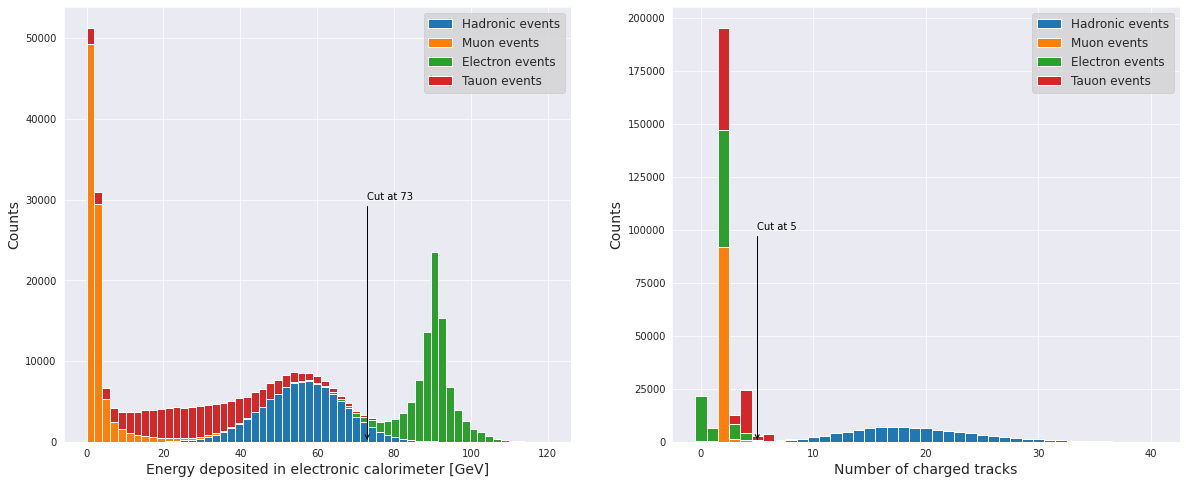

In [5]:
# cuts can probably be optimized still
cut_E_ecal = 73
cut_N_Ctrk = 5

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_ee = np.linspace(0,120,60)

mask_ee_E_ecal = branches_ee[var_E_ecal] >cut_E_ecal
mask_mm_E_ecal = branches_mm[var_E_ecal] >cut_E_ecal
mask_tt_E_ecal = branches_tt[var_E_ecal] >cut_E_ecal
mask_qq_E_ecal = branches_qq[var_E_ecal] >cut_E_ecal

mask_qq_N_Ctrk = branches_qq[var_N_char] < cut_N_Ctrk
mask_ee_N_Ctrk = branches_ee[var_N_char] < cut_N_Ctrk
mask_tt_N_Ctrk = branches_tt[var_N_char] < cut_N_Ctrk
mask_mm_N_Ctrk = branches_mm[var_N_char] < cut_N_Ctrk

output_ee = [a == p for a,p in zip(mask_ee_E_ecal,mask_ee_N_Ctrk) if a==True]   # Compares the two masks, check
output_qq = [a == p for a,p in zip(mask_qq_E_ecal,mask_qq_N_Ctrk) if a==True]
output_tt = [a == p for a,p in zip(mask_tt_E_ecal,mask_tt_N_Ctrk) if a==True]
output_mm = [a == p for a,p in zip(mask_mm_E_ecal,mask_mm_N_Ctrk) if a==True]

# output works as follows: the function in the brackets checks all values of mask_E_ecal and selects all that are True, that is the length of the array. It then checks whether the corresponding values in mask_N_Ctrk are True as well, if that is the case it saves a True, otherwise a False. The sum of hte output is therefore the number of events that passed both cuts. 

efficiency_ee = np.sum(output_ee)/len(ee[2,:]) # Gives the percentage of electron events surviving the cut
precision_ee = np.sum(output_ee)/len(ee[1,:])
precision_em = np.sum(output_mm)/len(mm[1,:])
precision_et = np.sum(output_tt)/len(tt[1,:])
precision_eq = np.sum(output_qq) /len(qq[1,:])

%matplotlib inline
sb.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal), xy=(cut_E_ecal, 0.2), xycoords='data',xytext=(cut_E_ecal, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=bin_ee, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_N_Ctrk), xy=(cut_N_Ctrk, 0.2), xycoords='data',xytext=(cut_N_Ctrk, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax2.set_xlabel("Number of charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of electron events surviving the cut", efficiency_ee,", the share of electron ",precision_ee," muon ",precision_em," tauon ",precision_et," and hadron ",precision_eq," events on the total of the cut survivors with the cut 'mask_ee_E_ecal'")

In [19]:
#plt.savefig("name.PDF")

##### Muon events

In [20]:
# Ideas for cuts:
# Separation from hadrons via N_char, separation from electrons via E_ecal, separation from tauons via P_char
# Last one (distinction from tauons) is probably most difficult as 1. the P=0 events need to be included -> We need two cuts for the same parameter and 2. there still is a notable overlap between tauons and muons

The percentage of muon events surviving the cut 0.951166018584249 , the share of electron  0.0  muon  0.951166018584249  tauon  0.005276845002146085  and hadron  1.0145795075231071e-05  events on the total of the cut survivors with the cut 'mask_mm'


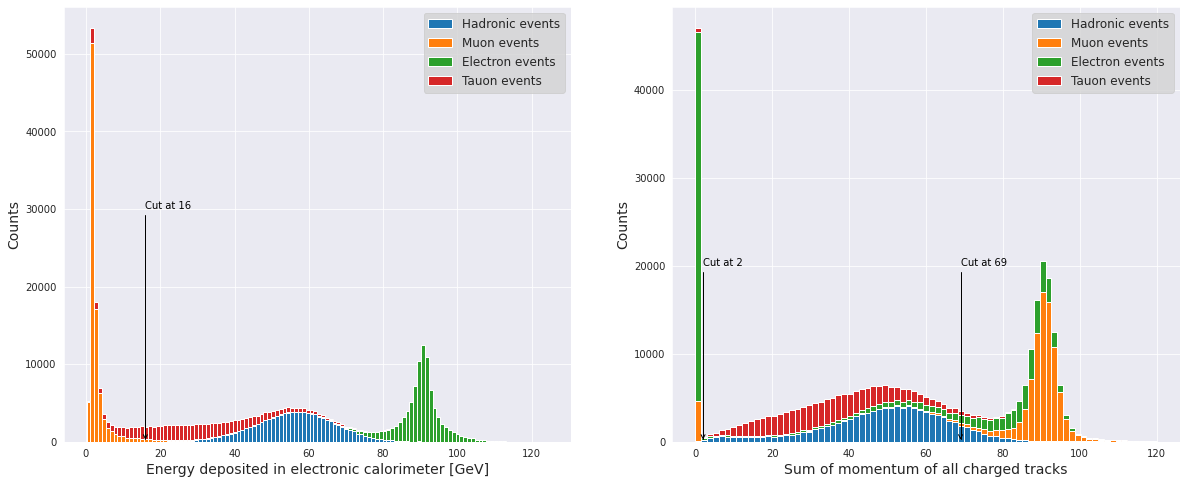

In [6]:
cut_P_char_high = 69
cut_P_char_low = 2
cut_E_ecal = 16
cut_N_Ctrk = 5

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_qq_P_char_high = branches_qq[var_P_char] > cut_P_char_high
mask_ee_P_char_high = branches_ee[var_P_char] > cut_P_char_high
mask_tt_P_char_high = branches_tt[var_P_char] > cut_P_char_high
mask_mm_P_char_high = branches_mm[var_P_char] > cut_P_char_high

mask_qq_E_ecal_high = branches_qq[var_E_ecal] < cut_E_ecal
mask_ee_E_ecal_high = branches_ee[var_E_ecal] < cut_E_ecal
mask_tt_E_ecal_high = branches_tt[var_E_ecal] < cut_E_ecal
mask_mm_E_ecal_high = branches_mm[var_E_ecal] < cut_E_ecal

mask_qq_P_char_low = branches_qq[var_P_char] < cut_P_char_low
mask_ee_P_char_low = branches_ee[var_P_char] < cut_P_char_low
mask_tt_P_char_low = branches_tt[var_P_char] < cut_P_char_low
mask_mm_P_char_low = branches_mm[var_P_char] < cut_P_char_low

mask_qq_E_ecal_low = branches_qq[var_E_ecal] < cut_E_ecal
mask_ee_E_ecal_low = branches_ee[var_E_ecal] < cut_E_ecal
mask_tt_E_ecal_low = branches_tt[var_E_ecal] < cut_E_ecal
mask_mm_E_ecal_low = branches_mm[var_E_ecal] < cut_E_ecal

output_ee_high = [a == p for a,p in zip(mask_ee_E_ecal_high,mask_ee_P_char_high) if a==True]   # Compares the two masks, check
output_qq_high = [a == p for a,p in zip(mask_qq_E_ecal_high,mask_qq_P_char_high) if a==True]
output_tt_high = [a == p for a,p in zip(mask_tt_E_ecal_high,mask_tt_P_char_high) if a==True]
output_mm_high = [a == p for a,p in zip(mask_mm_E_ecal_high,mask_mm_P_char_high) if a==True]

output_ee_low = [a == p for a,p in zip(mask_ee_E_ecal_low,mask_ee_P_char_low) if a==True]   # Compares the two masks, check
output_qq_low = [a == p for a,p in zip(mask_qq_E_ecal_low,mask_qq_P_char_low) if a==True]
output_tt_low = [a == p for a,p in zip(mask_tt_E_ecal_low,mask_tt_P_char_low) if a==True]
output_mm_low = [a == p for a,p in zip(mask_mm_E_ecal_low,mask_mm_P_char_low) if a==True]

output_mm = output_mm_high + output_mm_low
output_ee = output_ee_high + output_ee_low
output_tt = output_tt_high + output_tt_low
output_qq = output_qq_high + output_qq_low

efficiency_mm = np.sum(output_mm)/len(mm[2,:]) # Gives the percentage of muon events surviving the cut
precision_me = np.sum(output_ee)/len(ee[1,:])
precision_mm = np.sum(output_mm)/len(mm[1,:])
precision_mt = np.sum(output_tt)/len(tt[1,:])
precision_mq = np.sum(output_qq) / len(qq[1,:])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal), xy=(cut_E_ecal, 0.2), xycoords='data',xytext=(cut_E_ecal, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high), xy=(cut_P_char_high, 0.2), xycoords='data',xytext=(cut_P_char_high, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low), xy=(cut_P_char_low, 0.2), xycoords='data',xytext=(cut_P_char_low, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of muon events surviving the cut", efficiency_mm,", the share of electron ",precision_me," muon ",precision_mm," tauon ",precision_mt," and hadron ",precision_mq," events on the total of the cut survivors with the cut 'mask_mm'")

##### Tauon events

In [22]:
# Ideas for cuts:
# Similar to the previous: Separation from hadrons via N_char, separation from electrons via E_ecal, separation from muons via P_char

In [7]:
# Warning: This cell takes quite long to execute

cut_P_char_low = 2

qq_P_char_greater_low = np.asarray([])
for i in range (0, int(len(qq[3])-1.)):
    if (qq[3,i]>cut_P_char_low):
        qq_P_char_greater_low = np.append(qq_P_char_greater_low, qq[3,i])
    else:
        qq_P_char_greater_low = np.append(qq_P_char_greater_low, 1000)
ee_P_char_greater_low = np.asarray([])
for i in range (0, int(len(ee[3])-1.)):
    if (ee[3,i]>cut_P_char_low):
        ee_P_char_greater_low = np.append(ee_P_char_greater_low, ee[3,i])
    else:
        ee_P_char_greater_low = np.append(ee_P_char_greater_low, 1000)
mm_P_char_greater_low = np.asarray([])
for i in range (0, int(len(mm[3])-1.)):
    if (mm[3,i]>cut_P_char_low):
        mm_P_char_greater_low = np.append(mm_P_char_greater_low, mm[3,i])
    else:
        mm_P_char_greater_low = np.append(mm_P_char_greater_low, 1000)
tt_P_char_greater_low = np.asarray([])
for i in range (0, int(len(tt[3])-1.)):
    if (tt[3,i]>cut_P_char_low):
        tt_P_char_greater_low = np.append(tt_P_char_greater_low, tt[3,i])
    else:
        tt_P_char_greater_low = np.append(tt_P_char_greater_low, 1000)
# Introduced to perform a cut from both edges: Events with P_char <= 'low' are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

In [8]:
# Warning: This cell takes quite long to execute
cut_E_ecal_low = 1

qq_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(qq[4])-1.)):
    if (qq[4,i]>cut_E_ecal_low):
        qq_E_ecal_greater_low = np.append(qq_E_ecal_greater_low, qq[4,i])
    else:
        qq_E_ecal_greater_low = np.append(qq_E_ecal_greater_low, 1000)
ee_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(ee[4])-1.)):
    if (ee[4,i]>cut_E_ecal_low):
        ee_E_ecal_greater_low = np.append(ee_E_ecal_greater_low, ee[4,i])
    else:
        ee_E_ecal_greater_low = np.append(ee_E_ecal_greater_low, 1000)
mm_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(mm[4])-1.)):
    if (mm[4,i]>cut_E_ecal_low):
        mm_E_ecal_greater_low = np.append(mm_E_ecal_greater_low, mm[4,i])
    else:
        mm_E_ecal_greater_low = np.append(mm_E_ecal_greater_low, 1000)
tt_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(tt[4])-1.)):
    if (tt[4,i]>cut_E_ecal_low):
        tt_E_ecal_greater_low = np.append(tt_E_ecal_greater_low, tt[4,i])
    else:
        tt_E_ecal_greater_low = np.append(tt_E_ecal_greater_low, 1000)
# Introduced to perform a cut from both edges: Events with E_ecal <= 2 are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

The percentage of tauon events surviving the cut 0.9267553715252355 , the share of electron  0.003912496535255112  muon  0.021614519871584324  tauon  0.9267553715252355  and hadron  0.004291671316822743  events on the total of the cut survivors with the cut 'mask_tt'


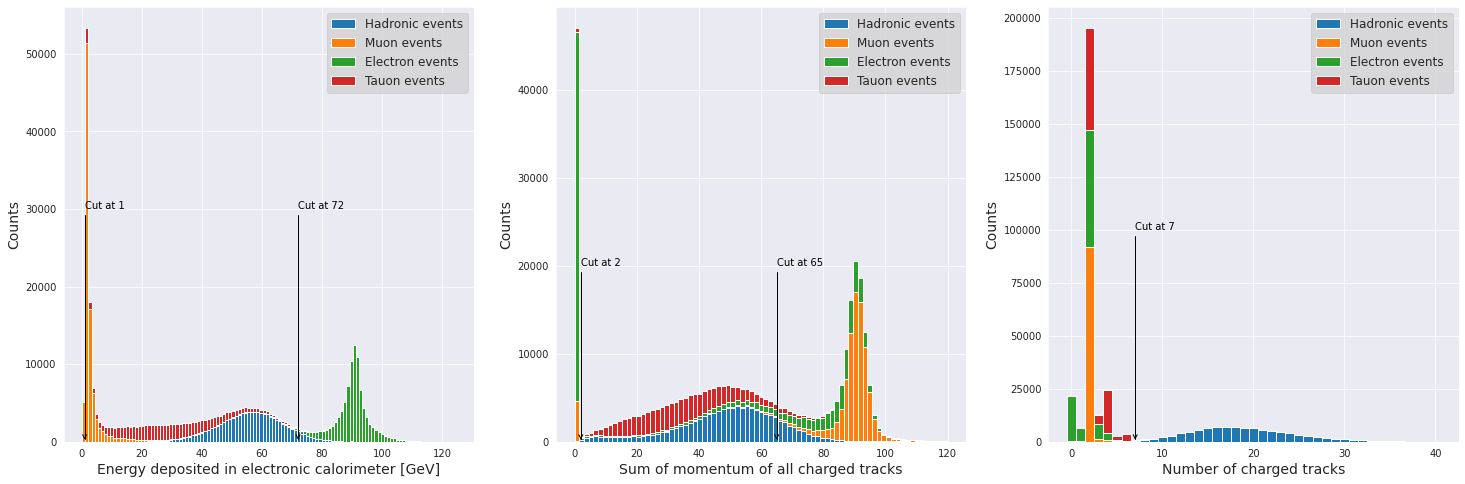

In [9]:
cut_P_char_high = 65
cut_E_ecal_high = 72
cut_N_Ctrk = 7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_qq_N_Ctrk = branches_qq[var_N_char] < cut_N_Ctrk
mask_ee_N_Ctrk = branches_ee[var_N_char] < cut_N_Ctrk
mask_tt_N_Ctrk = branches_tt[var_N_char] < cut_N_Ctrk
mask_mm_N_Ctrk = branches_mm[var_N_char] < cut_N_Ctrk

mask_qq_P_char_high = qq_P_char_greater_low < cut_P_char_high
mask_ee_P_char_high = ee_P_char_greater_low < cut_P_char_high
mask_tt_P_char_high = tt_P_char_greater_low < cut_P_char_high
mask_mm_P_char_high = mm_P_char_greater_low < cut_P_char_high

mask_qq_E_ecal_high = qq_E_ecal_greater_low < cut_E_ecal_high
mask_ee_E_ecal_high = ee_E_ecal_greater_low < cut_E_ecal_high
mask_tt_E_ecal_high = tt_E_ecal_greater_low < cut_E_ecal_high
mask_mm_E_ecal_high = mm_E_ecal_greater_low < cut_E_ecal_high

output_ee = [a == p == n for a,p,n in zip(mask_ee_E_ecal_high,mask_ee_P_char_high,mask_ee_N_Ctrk) if a==True]   # Compares the two masks, check
output_qq = [a == p == n for a,p,n in zip(mask_qq_E_ecal_high,mask_qq_P_char_high,mask_qq_N_Ctrk) if a==True]
output_tt = [a == p == n for a,p,n in zip(mask_tt_E_ecal_high,mask_tt_P_char_high,mask_tt_N_Ctrk) if a==True]
output_mm = [a == p == n for a,p,n in zip(mask_mm_E_ecal_high,mask_mm_P_char_high,mask_mm_N_Ctrk) if a==True]

event_sum =  np.sum(output_mm) + np.sum(output_ee) + np.sum(output_tt) + np.sum(output_qq)
efficiency_tt = np.sum(output_tt)/len(tt[2,:]) # Gives the percentage of muon events surviving the cut
precision_te = np.sum(output_ee)/len(ee[1,:])
precision_tm = np.sum(output_mm)/len(mm[1,:])
precision_tt = np.sum(output_tt)/len(tt[1,:])
precision_tq = np.sum(output_qq) / len(qq[1,:])

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(25)

ax1.annotate("Cut at " + str(cut_E_ecal_high), xy=(cut_E_ecal_high, 0.2), xycoords='data',xytext=(cut_E_ecal_high, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.annotate("Cut at " + str(cut_E_ecal_low), xy=(cut_E_ecal_low, 0.2), xycoords='data',xytext=(cut_E_ecal_low, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high), xy=(cut_P_char_high, 0.2), xycoords='data',xytext=(cut_P_char_high, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low), xy=(cut_P_char_low, 0.2), xycoords='data',xytext=(cut_P_char_low, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax3.annotate("Cut at " + str(cut_N_Ctrk), xy=(cut_N_Ctrk, 0.2), xycoords='data',xytext=(cut_N_Ctrk, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax3.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax3.set_xlabel("Number of charged tracks", fontsize=14)
ax3.set_ylabel("Counts", fontsize=14)
ax3.legend(frameon=True, facecolor="lightgrey", fontsize=12)


print("The percentage of tauon events surviving the cut", efficiency_tt,", the share of electron ",precision_te," muon ",precision_tm," tauon ",precision_tt," and hadron ",precision_tq," events on the total of the cut survivors with the cut 'mask_tt'")

##### Summary: Cut parameters and efficiency matrix

In [10]:
matrix_eff = np.array([[precision_ee,precision_em,precision_et,precision_eq],[precision_me,precision_mm,precision_mt,precision_mq],[precision_te,precision_tm,precision_tt,precision_tq],[precision_qe,precision_qm,precision_qt,precision_qq]])

def error_matrix_eff_element(N_tot,N_sel):
    error_N_tot = (N_sel/(N_tot**1.5))**2
    error_N_sel = (np.sqrt(N_sel)/(N_tot))**2
    error = np.sqrt(error_N_tot + error_N_sel)
    return error

length = np.array([len(ee[1,:]),len(mm[1,:]),len(tt[1,:]),len(qq[1,:])])

err_matrix_eff = np.zeros([4,4])


for i in range(4):
    for j in range(4):
        err_matrix_eff[i,j] = error_matrix_eff_element(length[i],matrix_eff[i,j]*length[j])

print(matrix_eff)
print(err_matrix_eff)



[[9.67282148e-01 1.05953529e-05 6.40038377e-03 2.02915902e-05]
 [0.00000000e+00 9.51166019e-01 5.27684500e-03 1.01457951e-05]
 [3.91249654e-03 2.16145199e-02 9.26755372e-01 4.29167132e-03]
 [2.66518838e-04 0.00000000e+00 1.23210544e-02 9.94724187e-01]]
[[4.50405684e-03 1.06608103e-05 2.40692414e-04 1.50767429e-05]
 [0.00000000e+00 4.43438083e-03 2.17101666e-04 1.05954090e-05]
 [2.42401226e-04 5.77476802e-04 4.74782686e-03 2.60330297e-04]
 [5.07354085e-05 0.00000000e+00 3.18530244e-04 4.48679068e-03]]


In [32]:
# FROM HEREON IN, COPIED FROM z0_experiment
### Number of toy experiments to be done and find suitable ranges to fit/plot gaussian distributions successfully, IMPORTANT!!
ntoy = 2000

### Create numpy matrix of list to append elements of inverted toy matrices
inverse_toys = np.empty((4,4))

# Create toy efficiency matrix out of gaussian-distributed random values
for i in range(0,ntoy,1):
    toy_matrix = np.zeros((4,4))
    toy_matrix = np.random.normal(matrix_eff,err_matrix_eff,size=(4,4))
    
    ### Invert toy matrix
    inverse_toy = np.linalg.inv(toy_matrix)
    
    #print(inverse_toys.item(0,0),inverse_toy.item(0,0))
    # Append values
    inverse_toys = np.dstack((inverse_toys,inverse_toy))
    
# Define gaussian function to fit to the toy distributions:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


inverse_errors = np.zeros((4,4))
inverse_means = np.zeros((4,4))


fig = plt.figure(figsize=(20, 10),dpi=80)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
ax00 = plt.subplot(4,4,1)
ax01 = plt.subplot(4,4,2)
ax02 = plt.subplot(4,4,3)
ax03 = plt.subplot(4,4,4)

ax10 = plt.subplot(4,4,5)
ax11 = plt.subplot(4,4,6)
ax12 = plt.subplot(4,4,7)
ax13 = plt.subplot(4,4,8)

ax20 = plt.subplot(4,4,9)
ax21 = plt.subplot(4,4,10)
ax22 = plt.subplot(4,4,11)
ax23 = plt.subplot(4,4,12)

ax30 = plt.subplot(4,4,13)
ax31 = plt.subplot(4,4,14)
ax32 = plt.subplot(4,4,15)
ax33 = plt.subplot(4,4,16)

axes = [[ax00,ax01,ax02,ax03],
        [ax10,ax11,ax12,ax13],
        [ax20,ax21,ax22,ax23],
        [ax30,ax31,ax32,ax33]]

ranges = [[(np.mean(inverse_toys[0,0,:]) - 0.95*np.std(inverse_toys[0,0,:]),np.mean(inverse_toys[0,0,:]) + 0.95*np.std(inverse_toys[0,0,:])),(0.000075,0.000225), (-0.009,-0.0055), (-0.0001,0.0001)],
          [(-0.01,0.01),(1.04,1.063)   , (-0.0075,-0.0045), (-0.0002,0.0002)],
          [(-0.005,-0.0035),(-0.002,0.002), (1.065,1.095)   , (-0.007,-0.003)],
          [(-0.0005,0.00),(0.00,0.0035), (-0.015,-0.012), (0.98,1.03)]]

# Fill histograms for each inverted matrix coefficient:
for j in range(0,4,1):
    for k in range(0,4,1):
        
        # Diagonal and off-diagonal terms have different histogram ranges
        hbins, hedges, _ = axes[j][k].hist(inverse_toys[j,k,:],bins=50,range=ranges[j][k],  histtype='step', linewidth=2, label=f'toyhist{j}{k}')
        axes[j][k].legend()

        ## Guess initial parameters of the fit by taking random value from hist and std
        _p0 = [ntoy/10.,np.std(inverse_toys[j,k,:]),np.std(inverse_toys[j,k,:])]

        # Get the fitted curve
        h_mid = 0.5*(hedges[1:] + hedges[:-1]) #Calculate midpoints for the fit
        coeffs, _ = curve_fit(gauss, h_mid, hbins, maxfev=10000, p0=_p0)
        h_fit = gauss(h_mid, *coeffs)
        
        axes[j][k].plot(h_mid, h_fit,label=f'Fit{j}{k}')

        inverse_means[j,k] = coeffs[1]
        inverse_errors[j,k] = abs(coeffs[2])

print(f"Errors for the inverse matrix:\n{inverse_errors}")
print(np.mean(inverse_toys[0][0]))

---

---

#4 Separating s- and t-channel
---
---

81 80 80
[-9.9751478e-01 -9.7257453e-01 -9.4763428e-01 -9.2269403e-01
 -8.9775372e-01 -8.7281346e-01 -8.4787321e-01 -8.2293296e-01
 -7.9799271e-01 -7.7305245e-01 -7.4811220e-01 -7.2317189e-01
 -6.9823164e-01 -6.7329139e-01 -6.4835113e-01 -6.2341088e-01
 -5.9847063e-01 -5.7353032e-01 -5.4859006e-01 -5.2364981e-01
 -4.9870956e-01 -4.7376931e-01 -4.4882903e-01 -4.2388877e-01
 -3.9894852e-01 -3.7400824e-01 -3.4906799e-01 -3.2412773e-01
 -2.9918748e-01 -2.7424720e-01 -2.4930695e-01 -2.2436668e-01
 -1.9942643e-01 -1.7448616e-01 -1.4954591e-01 -1.2460564e-01
 -9.9665381e-02 -7.4725121e-02 -4.9784858e-02 -2.4844596e-02
  9.5665455e-05  2.5035927e-02  4.9976189e-02  7.4916452e-02
  9.9856712e-02  1.2479697e-01  1.4973724e-01  1.7467749e-01
  1.9961776e-01  2.2455801e-01  2.4949828e-01  2.7443853e-01
  2.9937881e-01  3.2431906e-01  3.4925932e-01  3.7419957e-01
  3.9913985e-01  4.2408010e-01  4.4902036e-01  4.7396064e-01
  4.9890089e-01  5.2384114e-01  5.4878139e-01  5.7372165e-01
  5.9866196e-01

TypeError: object of type 'int' has no len()

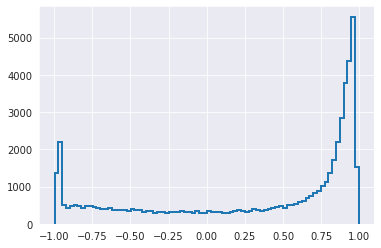

In [7]:
bins_cos_thet = 80
mask_ee_cos = branches_ee[var_cos_thet] < 1
bin_content_theta_fit, bin_edges_theta_fit, _ = plt.hist((ee[8,:][mask_ee_cos]),bins=bins_cos_thet,  histtype='step', linewidth=2, label='Pcharged')

bins_theta= np.asarray([])

#for i in range (0, int(len(qq[4])-1.)):
#    if (qq[4,i]>cut_E_ecal_low):

for i in range (0,int(len(bin_edges_theta_fit)-1.)):
    bins_theta=np.append(bins_theta,bin_edges_theta_fit[i]+(bin_edges_theta_fit[2]-bin_edges_theta_fit[1])/2)

    
print(len(bin_edges_theta_fit), len(bin_content_theta_fit), len(bins_theta))
print(bin_edges_theta_fit, bins_theta)

def s_t_channels(B, x):
    return B[0]*(1+x**2)+B[1]/(1-x)**2

mymodel = Model(s_t_channels)
mydata = RealData(bins_theta[2:int(len(bins_cos_thet)-2.)], bin_content_theta_fit[2:int(len(bins_cos_thet)-2.)], sx=10**(-99), sy=np.sqrt(bin_content_theta_fit)) 
myodr = ODR(mydata, mymodel, beta0=[400, 100], job=2) 
output_s_t = myodr.run() 

print("This is just to obtain the fit parameters")
print(" ")
output_s_t.pprint() 
print(" ")



NameError: name 'output_s_t' is not defined

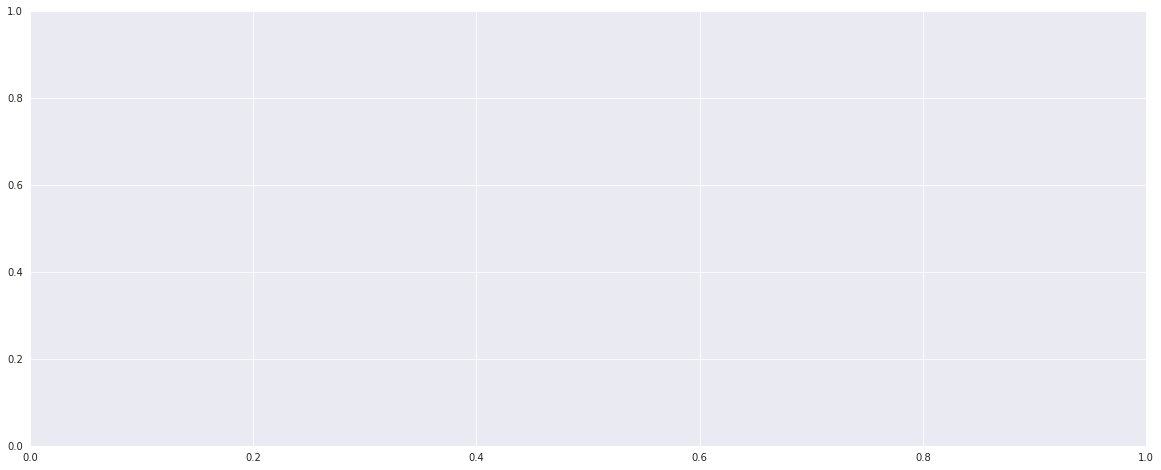

In [6]:
many_bins=np.linspace(-0.99,0.96,1000)

%matplotlib inline
sb.set_style("darkgrid")

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)

ax.plot(many_bins, s_t_channels(output_s_t.beta, many_bins), color="black", zorder=5, label="Fit")
#ax.plot(many_bins, s_t_channels([1094.35774919,0], many_bins), color="red", zorder=4, label="S-channel")
#ax.plot(many_bins, s_t_channels([0,20.16079729], many_bins), color="limegreen", zorder=4, label="T-channel")
ax.hist((ee[8,:][mask_ee_cos]), bins=bin_edges_theta_fit, label=("Electron events"), stacked=True)
ax.legend(frameon=True, facecolor="lightgrey", fontsize=12)

In [0]:
# Tried my best - but it simply looks like the T-channel function needs to be broadened somehow, which doesn't make sense

[549.20842188  27.84705785]
[3139. 1006.  717.  805.  725.  764.  722.  676.  657.  598.  608.  563.
  609.  592.  540.  541.  494.  539.  484.  503.  519.  534.  510.  501.
  469.  530.  489.  511.  479.  532.  581.  520.  600.  585.  580.  647.
  704.  730.  776.  839.  957. 1069. 1305. 1394. 1732. 2368. 3418. 5362.
 7310. 4887.] [3139. 1006.  717.  805.  725.  764.  722.  676.  657.  598.  608.  563.
  609.  592.  540.  541.  494.  539.  484.  503.  519.  534.  510.  501.
  469.  530.  489.  511.  479.  532.  581.  520.  600.  585.  580.  647.
  704.  730.  776.  839.  957. 1069. 1305. 1394. 1732. 2368. 3418. 5362.
 7310. 4887.]
[-0.97756255 -0.9376582  -0.8977537  -0.85784936 -0.8179449  -0.7780405
 -0.73813605 -0.6982317  -0.6583272  -0.61842287 -0.5785184  -0.53861403
 -0.49870956 -0.45880514 -0.41890073 -0.3789963  -0.3390919  -0.29918748
 -0.25928307 -0.21937864 -0.17947422 -0.1395698  -0.09966538 -0.05976097
 -0.01985654  0.02004788  0.0599523   0.09985671  0.13976113  0.17966

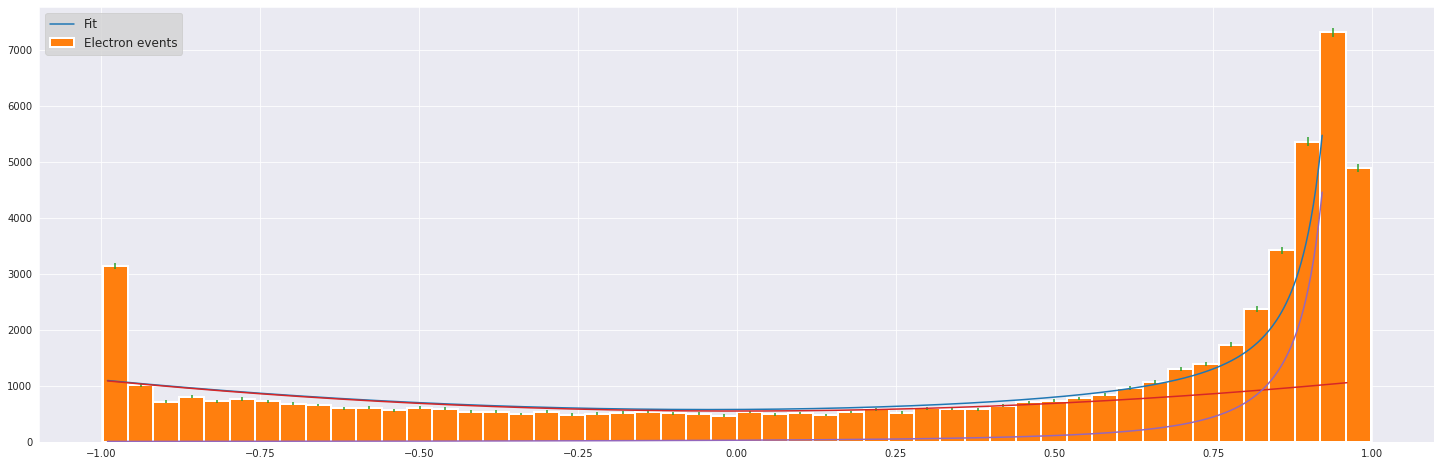

In [27]:
# s and t channel fit
def s_channel(x):
    return 1+x**2
def t_channel(x):
    return 1/(1-x)**2
def mix(x,a,b):
    return a*s_channel(x) + b * t_channel(x)

bins_cos_thet = 50

mask_ee_cos = branches_ee[var_cos_thet] < 1

cos_t = np.linspace(1,-1,bins_cos_thet)

bin_content_theta_fit, bin_edges_theta_fit, _ = plt.hist((ee[8,:][mask_ee_cos]),bins=bins_cos_thet,  histtype='step', linewidth=2, label='Pcharged')
mid_theta_fit = 0.5*(bin_edges_theta_fit[1:] + bin_edges_theta_fit[:-1]) #Calculate midpoint of the bars
err_theta = np.sqrt(bin_content_theta_fit)


p0 = [1049,20]
pars,cov = curve_fit(mix,mid_theta_fit[1:bins_cos_thet-1],bin_content_theta_fit[1:bins_cos_thet-1],p0)
# tried with excluding the first bin, changes a little bit, but nothing dramatic

%matplotlib inline
sb.set_style("darkgrid")

fit = mix(many_bins,*pars)

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(25)
ax.plot(many_bins[:980], fit[:980], label='Fit')
ax.hist((ee[8,:][mask_ee_cos]), bins=bins_cos_thet, label=("Electron events"),linewidth=2, stacked=True)
ax.errorbar(mid_theta_fit, bin_content_theta_fit, yerr=err_theta, histtype='step',fmt='none')
ax.plot(many_bins,pars[0] * s_channel(many_bins))
ax.plot(many_bins[:980],pars[1]*t_channel(many_bins[:980]))
ax.legend(frameon=True, facecolor="lightgrey", fontsize=12)
print(pars)
print(bin_content_theta_fit,bin_content_theta_fit)
print(mid_theta_fit)



In [0]:
# t and s channel: 
# Fit the cos(theta) distribution for electron samples s: 1+cos^2(theta), t: (1-cos(theta))^(-2)
# First select electron events, then exclude t-channel

# 5 Actual data

In [5]:
path_actual_data = 'opal_data/data/'
# somehow, an os error occurs if I want to import the daten_4 file 
data_file = uproot.open(path_actual_data+'daten_4.root')

ttree_name = 'myTTree'

data_file[ttree_name].keys()

branches_data = data_file[ttree_name].arrays()

lumi, stat_err_lumi, err_lumi, total_err_lumi = np.loadtxt(path_actual_data+'lumi_files/daten_4.csv',delimiter=",", skiprows=1, usecols=(1,2,3,4), unpack = True)

# arrays sorted by properties: run, event, N_char, P_char, E_ecal, E_hcal, E_beam, cos_thru, cos_thet
data=np.asarray([ak.to_numpy(branches_data[var_run]),ak.to_numpy(branches_data[var_event]),ak.to_numpy(branches_data[var_N_char]),ak.to_numpy(branches_data[var_P_char]),ak.to_numpy(branches_data[var_E_ecal]),ak.to_numpy(branches_data[var_E_hcal]),ak.to_numpy(branches_data[var_E_beam]),ak.to_numpy(branches_data[var_cos_thru]),ak.to_numpy(branches_data[var_cos_thet])])
print(path_actual_data + 'daten_4.root')
print(lumi)

opal_data/data/daten_4.root
[ 463.979   667.5236  486.7641 2246.568   535.908   450.6     709.698 ]


In [0]:
# Plotting

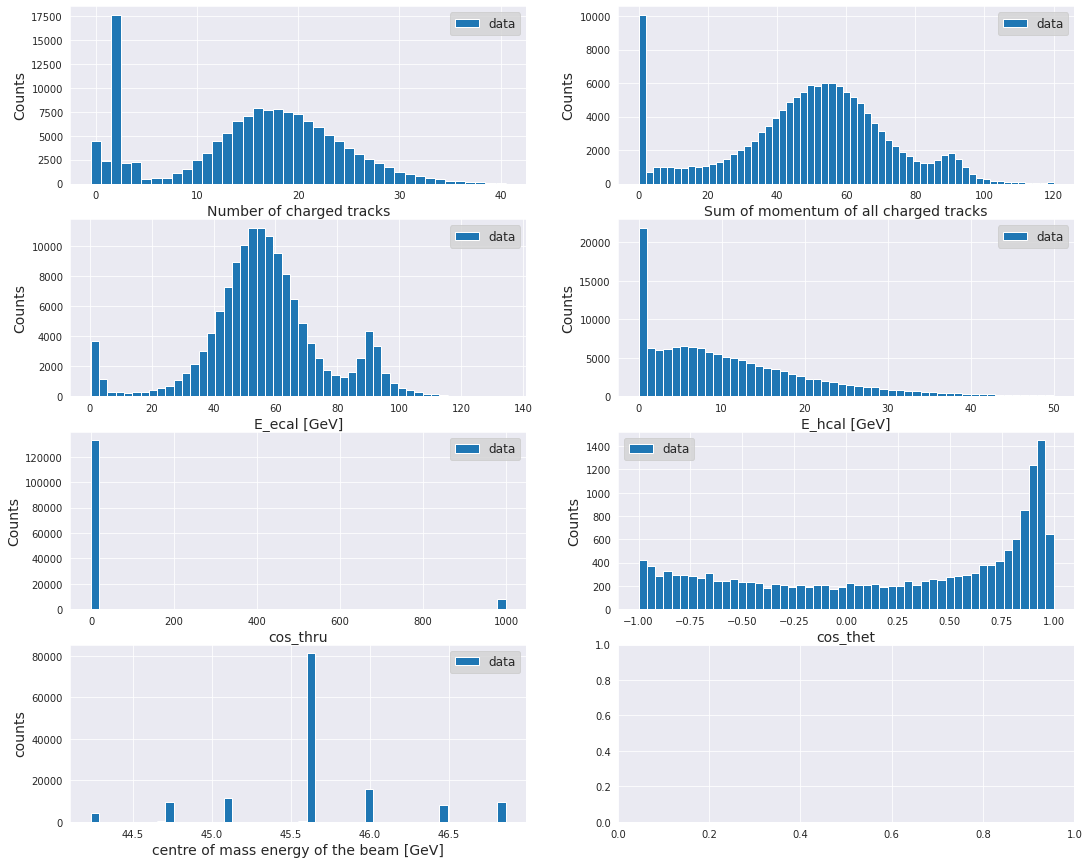

In [6]:
%matplotlib inline
sb.set_style("darkgrid")
label_hist = 'data'  # defines the label of the histograms, do we need a label?

#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)

fig,axs = plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(18)

axs[0,0].set_xlabel("Number of charged tracks", fontsize=14)
axs[0,0].set_ylabel("Counts", fontsize=14)
axs[0,0].hist(data[2,:], bins=bins_N_Ctrk_mc, label=(label_hist), stacked=True)
axs[0,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[0,1].set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
axs[0,1].set_ylabel("Counts", fontsize=14)
axs[0,1].hist(data[3,:], bins=bin_P_char, label=(label_hist), stacked=True)
axs[0,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# Use shorter x_Axis naming in final figure. Which unit?

axs[1,0].set_xlabel("E_ecal [GeV]", fontsize=14)
axs[1,0].set_ylabel("Counts", fontsize=14)
axs[1,0].hist(data[4,:], bins=50, label=(label_hist), stacked=True)
axs[1,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

axs[1,1].set_xlabel("E_hcal [GeV]", fontsize=14)
axs[1,1].set_ylabel("Counts", fontsize=14)
axs[1,1].hist(data[5,:], bins=50, range=(0,50),label=(label_hist), stacked=True)
axs[1,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)
# I am pretty sure that we need cos thru only for the hadrons and cos thet only for the leptons, I changed it to that way for the hadrons, the leptons are yet unchanged
# exclude or include correct labels, if we go forward with it
axs[2,0].set_xlabel("cos_thru", fontsize=14)
axs[2,0].set_ylabel("Counts", fontsize=14)
axs[2,0].hist(data[7,:], bins=50, label=(label_hist), stacked=True) #,mm[7,:],ee[7,:],tt[7,:])
axs[2,0].legend(frameon=True, facecolor="lightgrey", fontsize=12)

cos_thet_data = data[8,:][data[8,:] < 2]


axs[2,1].set_xlabel("cos_thet", fontsize=14)
axs[2,1].set_ylabel("Counts", fontsize=14)
axs[2,1].hist(cos_thet_data, bins=50, label=(label_hist), stacked=True)  # qq[8,:],mm[8,:],ee[8,:],tt[8,:]
axs[2,1].legend(frameon=True, facecolor="lightgrey", fontsize=12)


axs[3,0].set_xlabel('centre of mass energy of the beam [GeV]', fontsize=14)
axs[3,0].set_ylabel('counts',fontsize=14)
axs[3,0].hist(data[6,:],bins= 50, label=label_hist)
axs[3,0].legend(frameon=True, facecolor='lightgrey', fontsize=12)

# I wouldn't plot only hadrons for cos_thru and only leptons for cos_thet. I suggest we show all data here and concentrate on electron events in the next section

In [8]:
# we have to discriminate with respect to the different energies, furthermore the cut for the electrons has to be done at the cos_theta angle
print(data[6,:])

[45.627 45.627 45.627 ... 44.732 44.732 44.732]


In [11]:
# Define the energy masks

mask_energy_44_2 = data[6,:] < 44.5

prelim_mask_1 = data[6,:] < 45
prelim_mask_2 = data[6,:] < 45.5
prelim_mask_3 = data[6,:] < 45.75
prelim_mask_4 = data[6,:] < 46.3
prelim_mask_5 = data[6,:] < 46.6

mask_energy_44_7 = np.zeros([len(data[1,:])])
mask_energy_45_1 = np.zeros([len(data[1,:])])
mask_energy_45_6 = np.zeros([len(data[1,:])])
mask_energy_45_9 = np.zeros([len(data[1,:])])
mask_energy_46_4 = np.zeros([len(data[1,:])])

for i in range(len(data[1,:])):
    mask_energy_44_7[i] = bool(prelim_mask_1[i] != mask_energy_44_2[i])
    mask_energy_45_1[i] = bool(prelim_mask_2[i] != prelim_mask_1[i])
    mask_energy_45_6[i] = bool(prelim_mask_3[i] != prelim_mask_2[i])
    mask_energy_45_9[i] = bool(prelim_mask_4[i] != prelim_mask_3[i])
    mask_energy_46_4[i] = bool(prelim_mask_5[i] != prelim_mask_4[i])

mask_energy_46_8 = data[6,:] > 46.7

print(np.sum(mask_energy_44_2)+ np.sum(mask_energy_44_7)+ np.sum(mask_energy_45_1) +np.sum(mask_energy_45_6) + np.sum(mask_energy_45_9) + np.sum(mask_energy_46_4)+ np.sum(mask_energy_46_8))
print(len(mask_energy_44_2),len(data[1,:]))


4332 9747.0 11507.0 82009.0 16043.0 8065.0 9441
141144 141144


The number of cut out events is 111134 and the percentage of the total events is 0.787380264127416
[[     0.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.]
 [     0.      0.      0.      0.      0.      0.      0.]
 [111134. 111134. 111134. 111134. 111134. 111134. 111134.]]
False


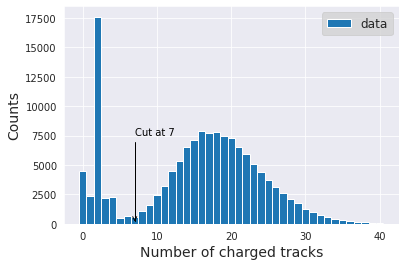

In [9]:
# hadron cuts
N_data = np.zeros([4,7])  # this is the N array for our fits later on

cut = 6  # Gives the value for the cut

mask_qq_N_Ctrk = branches_data[var_N_char] > cut

N_qq = np.sum(mask_qq_N_Ctrk) # Gives the percentage of hadron events surviving the cut

#Manually chosen bins 
bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)

%matplotlib inline
sb.set_style("darkgrid")

plt.annotate("Cut at 7", xy=(7, 0.2), xycoords='data',xytext=(7, 7500), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))

plt.hist(data[2,:], bins=bins_N_Ctrk_mc, label=(label_hist), stacked=True)

plt.xlabel("Number of charged tracks", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

N_data[3] = N_qq

print('The number of cut out events is', N_qq,'and the percentage of the total events is', N_qq/len(data[1,:]))
print(N_data)

The number of cut out events is 17869 and the percentage of the total events is 0.12660120160970356
[[ 17869.]
 [     0.]
 [     0.]
 [111134.]]


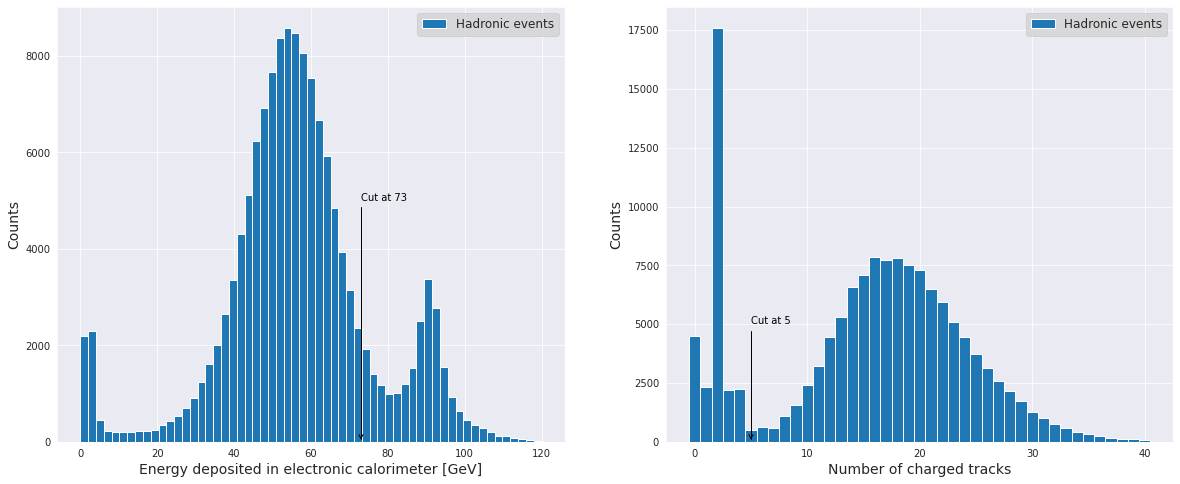

In [17]:
# electrons
cut_E_ecal = 73
cut_N_Ctrk = 5

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_ee = np.linspace(0,120,60)

mask_data_E_ecal = branches_data[var_E_ecal] >cut_E_ecal

mask_data_N_Ctrk = branches_data[var_N_char] < cut_N_Ctrk

output_data_ee = [a == p for a,p in zip(mask_data_E_ecal,mask_data_N_Ctrk) if a==True]   # Compares the two masks, check

N_ee = np.sum(output_data_ee)

%matplotlib inline
sb.set_style("darkgrid")

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal), xy=(cut_E_ecal, 0.2), xycoords='data',xytext=(cut_E_ecal, 5000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist(data[4,:], bins=bin_ee, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_N_Ctrk), xy=(cut_N_Ctrk, 0.2), xycoords='data',xytext=(cut_N_Ctrk, 5000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.hist(data[2,:], bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax2.set_xlabel("Number of charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

N_data[0] = N_ee

print('The number of cut out events is', N_ee,'and the percentage of the total events is', N_ee/len(data[1,:]))
print(N_data)

The number of cut out events is 4953 and the percentage of the total events is 0.035091821118857336
[[ 17869.]
 [  4953.]
 [ 10555.]
 [111134.]]


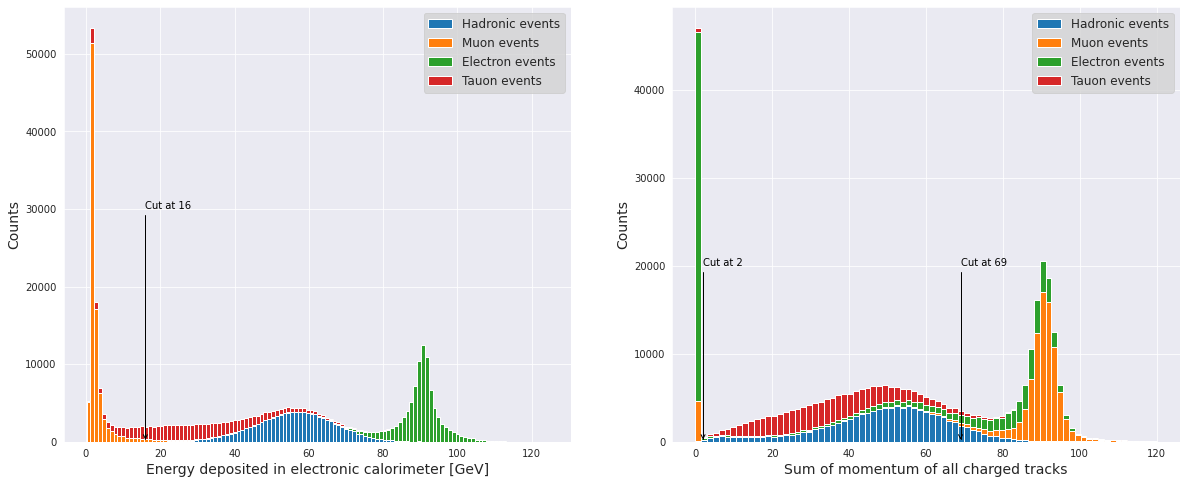

In [21]:
# Myons
cut_P_char_high = 69
cut_P_char_low = 2
cut_E_ecal = 16
cut_N_Ctrk = 5

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_data_P_char_high = branches_data[var_P_char] > cut_P_char_high

mask_data_E_ecal_high = branches_data[var_E_ecal] < cut_E_ecal

mask_data_P_char_low = branches_data[var_P_char] < cut_P_char_low

mask_data_E_ecal_low = branches_data[var_E_ecal] < cut_E_ecal

output_data_high = [a == p for a,p in zip(mask_data_E_ecal_high,mask_data_P_char_high) if a==True]   # Compares the two masks, check

output_data_low = [a == p for a,p in zip(mask_data_E_ecal_low,mask_data_P_char_low) if a==True]   # Compares the two masks, check

output_data_mm = output_data_high + output_data_low

N_mm = np.sum(output_data_mm)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)

ax1.annotate("Cut at " + str(cut_E_ecal), xy=(cut_E_ecal, 0.2), xycoords='data',xytext=(cut_E_ecal, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high), xy=(cut_P_char_high, 0.2), xycoords='data',xytext=(cut_P_char_high, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low), xy=(cut_P_char_low, 0.2), xycoords='data',xytext=(cut_P_char_low, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

N_data[1] = N_mm

print('The number of cut out events is', N_mm,'and the percentage of the total events is', N_mm/len(data[1,:]))
print(N_data)

The number of cut out events is 10555 and the percentage of the total events is 0.07478178314345633
[[ 17869.]
 [     0.]
 [ 10555.]
 [111134.]]


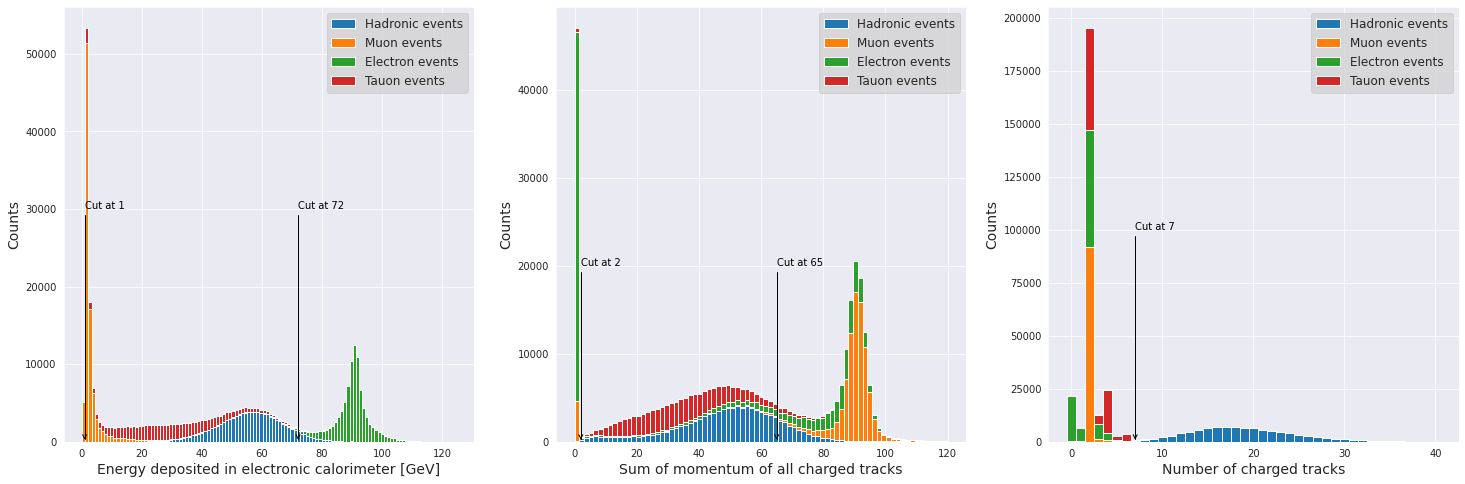

In [20]:
# Tauons
# Warning: This cell takes quite long to execute

cut_P_char_low = 2

data_P_char_greater_low = np.asarray([])
for i in range (0, int(len(qq[3])-1.)):
    if (data[3,i]>cut_P_char_low):
        data_P_char_greater_low = np.append(data_P_char_greater_low, qq[3,i])
    else:
        data_P_char_greater_low = np.append(data_P_char_greater_low, 1000)

# Warning: This cell takes quite long to execute
cut_E_ecal_low = 1

data_E_ecal_greater_low = np.asarray([])
for i in range (0, int(len(qq[4])-1.)):
    if (data[4,i] >cut_E_ecal_low):
        data_E_ecal_greater_low = np.append(data_E_ecal_greater_low, qq[4,i])
    else:
        data_E_ecal_greater_low = np.append(data_E_ecal_greater_low, 1000)

cut_P_char_high = 65
cut_E_ecal_high = 72
cut_N_Ctrk = 7

bins_N_Ctrk_mc = np.linspace(-0.5,40.5,42)
bin_P_char = np.linspace(0,120,60)
bin_P_char_2 = np.linspace(0,120,80)

mask_data_N_Ctrk = branches_data[var_N_char] < cut_N_Ctrk

mask_data_P_char_high = data_P_char_greater_low < cut_P_char_high

mask_data_E_ecal_high = data_E_ecal_greater_low < cut_E_ecal_high

output_data_tt = [a == p == n for a,p,n in zip(mask_data_E_ecal_high,mask_data_P_char_high,mask_data_N_Ctrk) if a==True]   # Compares the two masks, check

N_tt = np.sum(output_data_tt)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(25)

ax1.annotate("Cut at " + str(cut_E_ecal_high), xy=(cut_E_ecal_high, 0.2), xycoords='data',xytext=(cut_E_ecal_high, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.annotate("Cut at " + str(cut_E_ecal_low), xy=(cut_E_ecal_low, 0.2), xycoords='data',xytext=(cut_E_ecal_low, 30000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax1.hist((qq[4,:],mm[4,:],ee[4,:],tt[4,:]), bins=120, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
ax1.set_xlabel("Energy deposited in electronic calorimeter [GeV]", fontsize=14)
ax1.set_ylabel("Counts", fontsize=14)
ax1.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax2.annotate("Cut at " + str(cut_P_char_high), xy=(cut_P_char_high, 0.2), xycoords='data',xytext=(cut_P_char_high, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.annotate("Cut at " + str(cut_P_char_low), xy=(cut_P_char_low, 0.2), xycoords='data',xytext=(cut_P_char_low, 20000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax2.set_xlabel("Sum of momentum of all charged tracks", fontsize=14)
ax2.set_ylabel("Counts", fontsize=14)
ax2.hist((qq[3,:],mm[3,:],ee[3,:],tt[3,:]), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
ax2.legend(frameon=True, facecolor="lightgrey", fontsize=12)

ax3.annotate("Cut at " + str(cut_N_Ctrk), xy=(cut_N_Ctrk, 0.2), xycoords='data',xytext=(cut_N_Ctrk, 100000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))
ax3.hist((qq[2,:],mm[2,:],ee[2,:],tt[2,:]), bins=bins_N_Ctrk_mc, label=("Hadronic events","Muon events","Electron events","Tauon events",'masked hadronic'), stacked=True)

ax3.set_xlabel("Number of charged tracks", fontsize=14)
ax3.set_ylabel("Counts", fontsize=14)
ax3.legend(frameon=True, facecolor="lightgrey", fontsize=12)

N_data[2] = N_tt

print('The number of cut out events is', N_tt,'and the percentage of the total events is', N_tt/len(data[1,:]))
print(N_data)

# Introduced to perform a cut from both edges: Events with E_ecal <= 2 are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

# Introduced to perform a cut from both edges: Events with P_char <= 'low' are converted to events with value 1000 in this variable, so the high cut discriminates those events as well, without changing the position of events in the array.
# If loops are slow, but working

In [24]:
print('We select in total',np.sum(N_data), 'events out of a total of'  ,len(data[1,:]),'events in the dataset')

We select in total  144511.0 events out of a total of  141144 events in the dataset


In [15]:
# calculation of the cross sections, first fix the 

xs_corrections = np.array([[ 88.47, 89.46, 90.22, 91.22, 91.97, 92.96, 93.76] ,[2.0, 4.3, 7.7, 10.8, 4.7, -0.2, -1.6],[0.09, 0.20, 0.36, 0.52, 0.22, -0.01, -0.08]])
# it first gives the energy, then the hadronic correction and at last the leptonic correction

cross_sections = np.empty([4,7])

for i in range(7):  # i gives the energy parameter
    for j in range(4):  # j gives the particle 
        if j < 3:
            cross_sections[j,i] = inverse_means * N_data[:,i] * 1/lumi[i] + xs_corrections[2,i]
        else:
            cross_sections[j,i] = inverse_means * N_data[:,i] * 1/lumi[i] + xs_corrections[1,i]


print(xs_corrections[2,0])

0.09


#X Homeless cells
---
---

In [63]:

# Is this correct? 

# FB Asymmetry for muon events

cos_thet_muons_1 = np.asarray([]) # Excluding the cos_thet = 999 data points
for i in range (0, int(len(mm[8])-1.)):
    if (mm[8][i]<=1):
        cos_thet_muons_1 = np.append(cos_thet_muons_1, mm[8][i]) # Not perfectly elegant but working

print(np.mean(cos_thet_muons_1))

0.0026262964243866944


51932 93802
[81.32794  71.334854  0.       ... 73.69003  81.64756  80.798645] [-8.5578871e-01 -3.6037236e-01  9.9900000e+02 ...  7.3445606e-01
 -8.6465836e-01  8.7902808e-01]


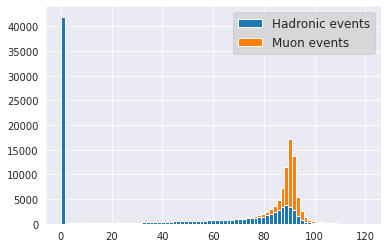

In [18]:
%matplotlib inline
sb.set_style("darkgrid")

mask_ee_P = branches_ee[var_P_char] >1
mask_ee_theta = branches_ee[var_cos_thet] < 2

E_cal = ee[4,:][ee[3,:] > 1]

plt.hist((ee[3,:],E_cal), bins=bin_P_char_2, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.plot(ee[4,:],ee[3,:],'bx')
plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print(len(E_cal), len(ee[1,:]))
print(ee[3,:],ee[8,:])

# shows, that if cos(theta) = 999, the sum of momenta of all tracks is 0, maybe leave them out completely


In [0]:
# try E/N mask, works but not really efficiently

cut_EN = 1500

E_over_N_ee = ee[4,:]**2/(ee[2,:]+1)
E_over_N_qq = qq[4,:]**2/(qq[2,:]+1)
E_over_N_mm = mm[4,:]**2/(mm[2,:]+1)
E_over_N_tt = tt[4,:]**2/(tt[2,:]+1)

mask_ee_EN = E_over_N_ee > cut_EN
mask_qq_EN = E_over_N_qq > cut_EN
mask_mm_EN = E_over_N_mm > cut_EN
mask_tt_EN = E_over_N_tt > cut_EN

event_sum =  np.sum(mask_qq_EN) + np.sum(mask_tt_EN) + np.sum(mask_ee_EN) + np.sum(mask_mm_EN)
efficiency_ee = np.sum(mask_ee_EN)/len(mask_ee_EN) # Gives the percentage of hadron events surviving the cut
precision_ee = np.sum(mask_ee_EN)/event_sum
precision_mm = np.sum(mask_mm_EN)/event_sum
precision_tt = np.sum(mask_tt_EN)/event_sum
precision_qq = np.sum(mask_qq_EN) / event_sum


bins_ee = np.linspace(-0.5,120.5,61)


%matplotlib inline
sb.set_style("darkgrid")

plt.annotate("Cut at 18", xy=(18, 0.2), xycoords='data',xytext=(18, 60000), textcoords='data', color="black",arrowprops=dict(arrowstyle="->",connectionstyle="arc", color="black", relpos=(0,0)))

plt.hist((E_over_N_qq,E_over_N_mm,E_over_N_ee,E_over_N_tt), range=(800,2000), label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True)
#plt.hist(ee_E_cal, zorder=5 , bins = bin_ee,label='electronic events after the cut')
plt.xlabel("E_ecal [GeV]", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)

print("The percentage of electron events surviving the cut", efficiency_ee,", the share of electron ",precision_ee," muon ",precision_mm," tauon ",precision_tt," and hadron ",precision_qq," events on the total of the cut survivors with the cut 'mask_ee_EN'")
print(ee[:,4].min())

In [0]:
# histogram (E_lep) Monte carlo data


%matplotlib inline
sb.set_style("darkgrid")

plt.hist((qq[6,:],mm[6,:],ee[6,:],tt[6,:]), bins=50, rwidth=0.6, label=("Hadronic events","Muon events","Electron events","Tauon events"), stacked=True) # rwidth parameter determines the bar width.

plt.xlabel("Half of centre of mass energy", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.legend(frameon=True, facecolor="lightgrey", fontsize=12)